# Analysing satelite data
Just like any other image data

## Data source


## Bands description

https://earth.esa.int/web/sentinel/user-guides/sentinel-2-msi/resolutions/spatial

![](https://earth.esa.int/image/image_gallery?uuid=c5fa6c3e-2978-4fb8-ac95-3be9c5171be2&groupId=247904&t=1345630320883)

SENTINEL-2 10 m spatial resolution bands: B2 (490 nm), B3 (560 nm), B4 (665 nm) and B8 (842 nm)

![](https://earth.esa.int/image/image_gallery?uuid=15dad96b-be6a-4b04-931d-d8c4db39e9e2&groupId=247904&t=1345630328076)

SENTINEL-2 20 m spatial resolution bands: B5 (705 nm), B6 (740 nm), B7 (783 nm), B8a (865 nm), B11 (1610 nm) and B12 (2190 nm)

![](https://earth.esa.int/image/image_gallery?uuid=f6117fbe-1513-4a84-acc4-845e14e5c876&groupId=247904&t=1345630315020)

SENTINEL-2 60 m spatial resolution bands: B1 (443 nm), B9 (940 nm) and B10 (1375 nm)

## Displaying color composition

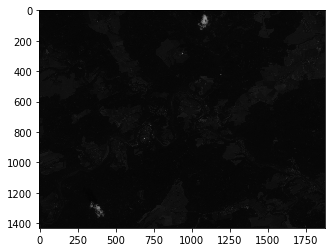

In [91]:
import rasterio
import rasterio.plot

blue_source = rasterio.open("../../data/sentinel/S2A_OPER_MSI_L1C_TL_EPA__20160605T113933_B02.tiff")
blue = blue_source.read()
rasterio.plot.show(blue, cmap="gray")

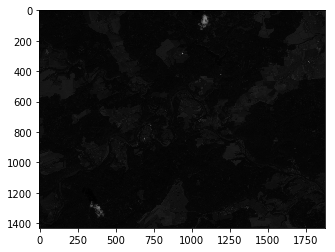

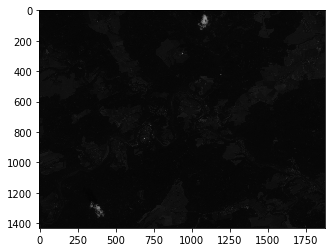

In [90]:
green_source = rasterio.open("../../data/sentinel/S2A_OPER_MSI_L1C_TL_EPA__20160605T113933_B03.tiff")
green = green_source.read()
rasterio.plot.show(green, cmap="gray")

red_source = rasterio.open("../../data/sentinel/S2A_OPER_MSI_L1C_TL_EPA__20160605T113933_B04.tiff")
red = red_source.read()
rasterio.plot.show(blue, cmap="gray")

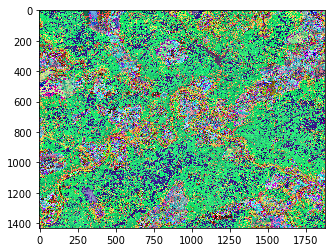

In [92]:
import rasterio.plot
import numpy as np

imgdata = np.array([red, green, blue])
rasterio.plot.show(imgdata)

![](../../images/rgb-sentinel2.png)

## Calculate NDVI
```
NDVI=(NIR−VIS)/(NIR+VIS)
```

In [124]:
nir_source = rasterio.open("../../data/sentinel/S2A_OPER_MSI_L1C_TL_EPA__20160605T113933_B08.tiff")
nir = nir_source.read()

![](../../images/nir-sentinel2.png)

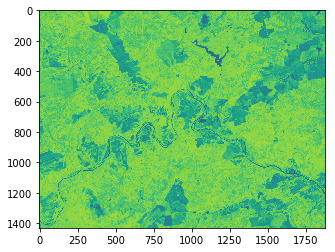

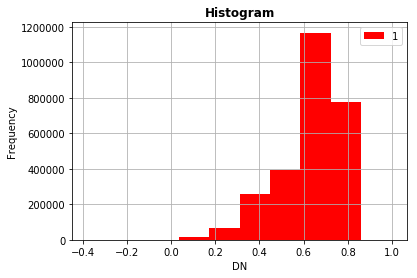

In [125]:
ndvi = (nir.astype(float)-red.astype(float))/(nir.astype(float)+red.astype(float))

rasterio.plot.show(ndvi)
rasterio.plot.show_hist(ndvi)

In [123]:
# save file
kwargs = red_source.meta
kwargs.update(dtype=rasterio.float64, count=1, compress='lzw')
with rasterio.open('../../outputs/ndvi.tif', 'w', **kwargs) as dst:
    dst.write_band(1, ndvi[0].astype(rasterio.float64))

/home/jachym/venvs/geopython-en/lib/python3.5/site-packages/rasterio/__init__.py:160: FutureWarning: GDAL-style transforms are deprecated and will not be supported in Rasterio 1.0.
  transform = guard_transform(transform)


![](../../images/ndvi-sentinel2.png)